In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ketangangal/heart-disease-dataset-uci")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-dataset-uci


In [15]:
# Replace with actual dataset if path differs
data = pd.read_csv("HeartDiseaseTrain-Test.csv")

# Preview
print(data.head())
print(data.shape)

   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1 

In [16]:
# Check missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data.dropna(inplace=True)

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [18]:
print(data.columns)

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


###Exploratory Data Analysis

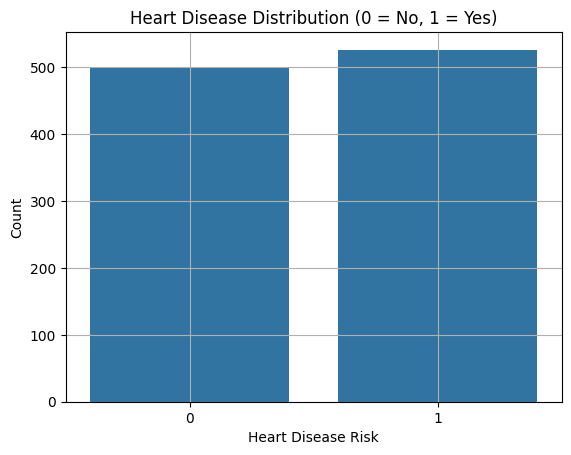

In [19]:
sns.countplot(x='target', data=data)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease Risk")
plt.ylabel("Count")
plt.grid(True)
plt.show()

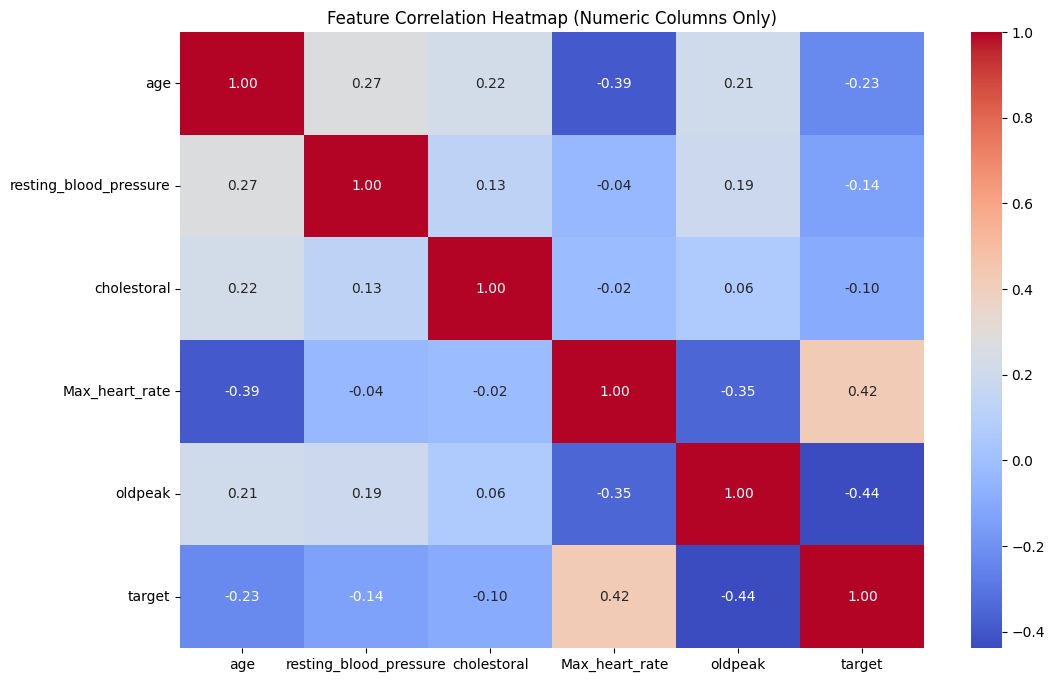

In [20]:
# Heatmap
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
plt.show()


###Feature Distrubution

In [21]:
X = data.drop('target', axis=1)
y = data['target']

data.columns = [col.lower().replace(' ', '_') for col in data.columns]

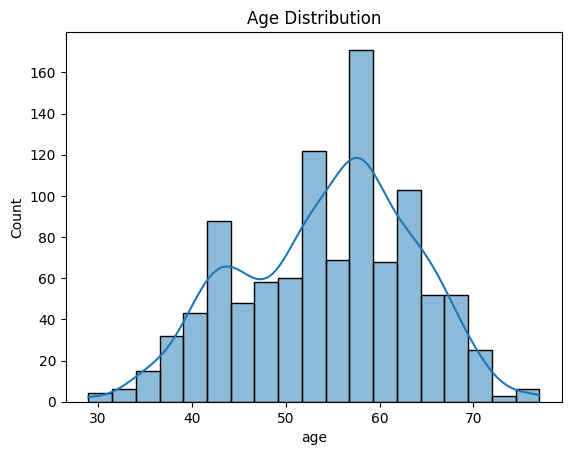

In [23]:
sns.histplot(data['age'], kde=True)
plt.title("Age Distribution")
plt.show()

[link text](https://)

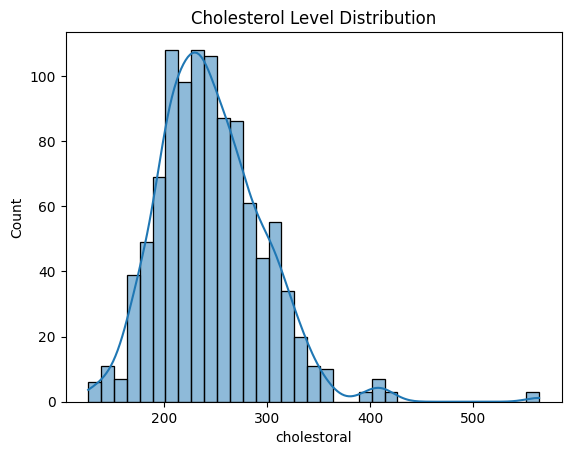

In [24]:
sns.histplot(data['cholestoral'], kde=True)
plt.title("Cholesterol Level Distribution")
plt.show()

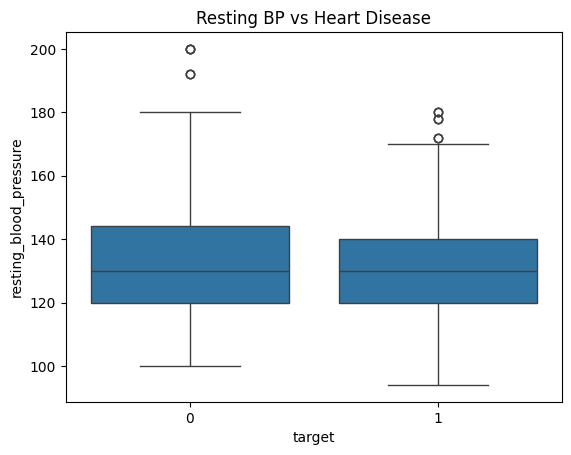

In [25]:
sns.boxplot(x='target', y='resting_blood_pressure', data=data)
plt.title("Resting BP vs Heart Disease")
plt.show()

###Categorical VS Target Feature

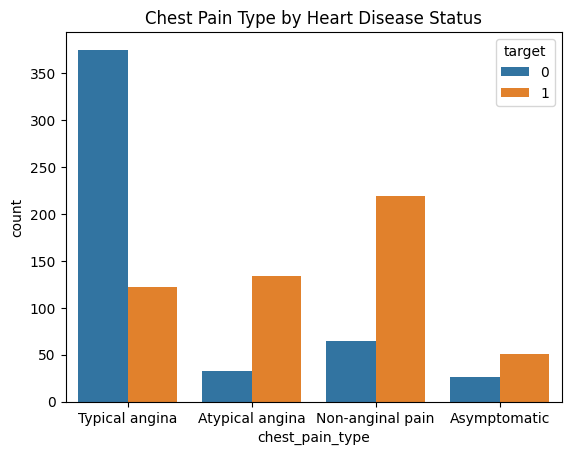

In [26]:
sns.countplot(x='chest_pain_type', hue='target', data=data)
plt.title("Chest Pain Type by Heart Disease Status")
plt.show()

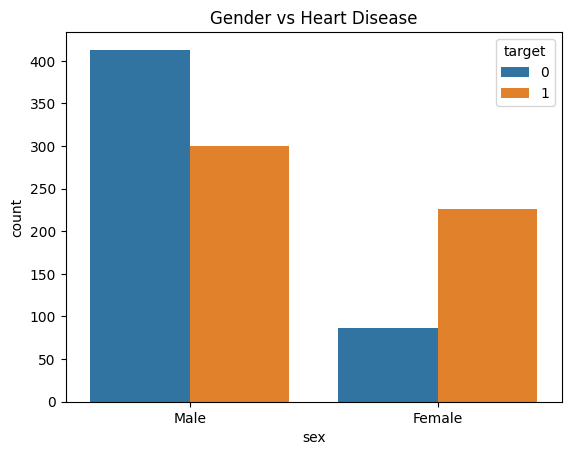

In [27]:
sns.countplot(x='sex', hue='target', data=data)
plt.title("Gender vs Heart Disease")
plt.show()

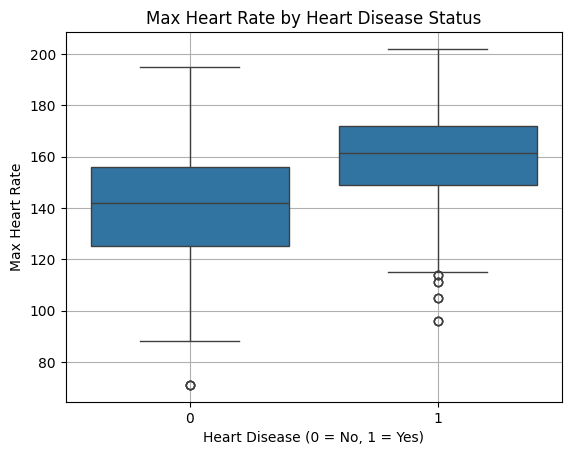

In [28]:
sns.boxplot(x='target', y='max_heart_rate', data=data)
plt.title("Max Heart Rate by Heart Disease Status")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate")
plt.grid(True)
plt.show()

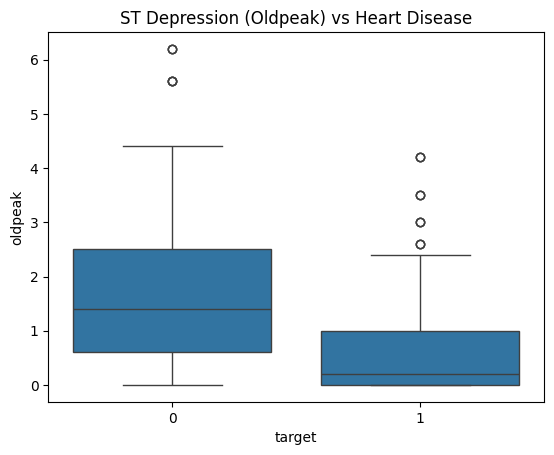

In [29]:
sns.boxplot(x='target', y='oldpeak', data=data)
plt.title("ST Depression (Oldpeak) vs Heart Disease")
plt.show()

###Feature and Target Selection
## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
print(data.dtypes)

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object


##Model Training
### Decision Tree


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Logistic Regression
print("🔍 Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

🔍 Logistic Regression Evaluation
Accuracy: 0.8146341463414634
ROC-AUC: 0.9038644584047211
Confusion Matrix:
 [[76 26]
 [12 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



###Confusion Matrix

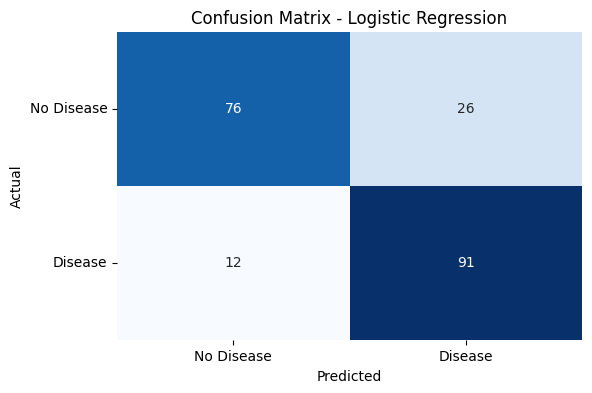

In [35]:
# Generate the confusion matrix
cm_lr = confusion_matrix(y_test, lr_preds)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ['No Disease', 'Disease'])
plt.yticks([0.5, 1.5], ['No Disease', 'Disease'], rotation=0)
plt.show()

Feature Coeffiecients

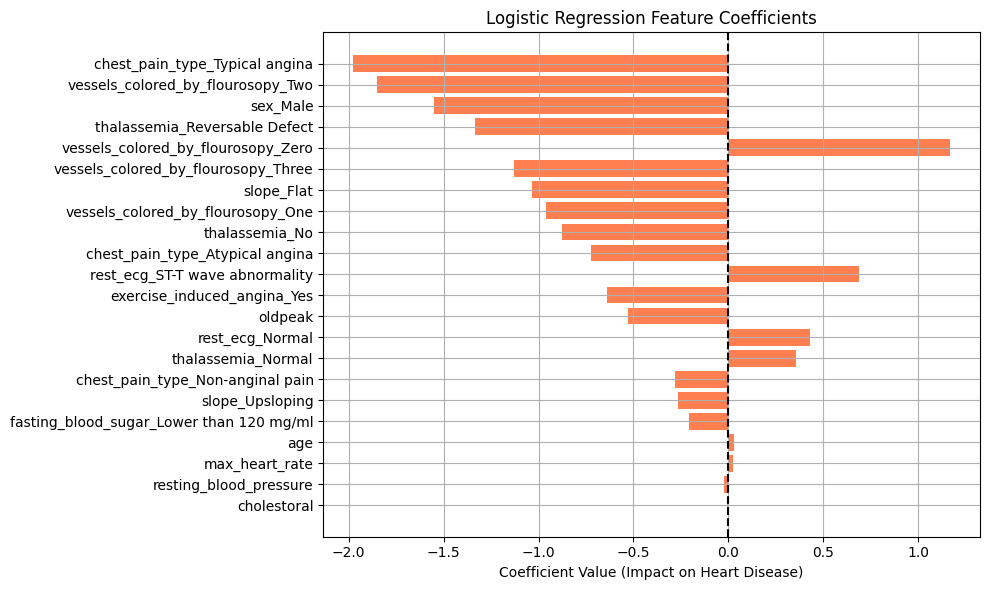

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame of features and their coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
})

# Sort by absolute value of coefficients (strongest impact first)
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'], color='coral')
plt.axvline(x=0, color='black', linestyle='--')
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient Value (Impact on Heart Disease)")
plt.grid(True)
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.show()